In [1]:
# подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [10]:
# получение цен нефти марки brent
brent_price = pd.read_excel("RBRTEd.xls", sheet_name="Data 1", skiprows=2)
brent_price = brent_price.rename({"Date": "Date", "Europe Brent Spot Price FOB (Dollars per Barrel)": "Brent Price"}, axis=1)
brent_price.head()



,Date,Brent Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [7]:
# получение данных о госдолге сша
usa_debt = pd.read_csv("DebtPenny_19930401_20240509.csv")
#переворачиваем данные, чтобы сначала шли старые потом новые как в цене нефти
usa_debt = usa_debt.iloc[::-1]
# переименовываем к единому стилю
usa_debt = usa_debt.rename({"Record Date": "Date"}, axis=1)

usa_debt.head()

,Date,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
7804,1993-04-01,NaN,NaN,4.225874e+12,1,1993,3,1993,2,4,1
7803,1993-04-02,NaN,NaN,4.233931e+12,1,1993,3,1993,2,4,2
7802,1993-04-05,NaN,NaN,4.234896e+12,1,1993,3,1993,2,4,5
7801,1993-04-06,NaN,NaN,4.235831e+12,1,1993,3,1993,2,4,6
7800,1993-04-07,NaN,NaN,4.246168e+12,1,1993,3,1993,2,4,7


In [11]:
# преводим даты в формат datetime
brent_price['Date'] = pd.to_datetime(brent_price['Date'])
usa_debt['Date'] = pd.to_datetime(usa_debt['Date'])

In [6]:
# вместо значений за день, смотрим среднее значение за месяц
brent_monthly = brent_price.resample('M').mean()

debt_monthly = usa_debt.resample('M').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [12]:
# склеиваем данные
data = pd.merge(brent_price, usa_debt, on='Date')
data.head()

,Date,Brent Price,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,1993-04-01,18.98,NaN,NaN,4.225874e+12,1,1993,3,1993,2,4,1
1,1993-04-02,18.88,NaN,NaN,4.233931e+12,1,1993,3,1993,2,4,2
2,1993-04-05,18.95,NaN,NaN,4.234896e+12,1,1993,3,1993,2,4,5
3,1993-04-06,18.65,NaN,NaN,4.235831e+12,1,1993,3,1993,2,4,6
4,1993-04-07,18.70,NaN,NaN,4.246168e+12,1,1993,3,1993,2,4,7


In [18]:
# отрезаем диапазон с 1987 до 1993 потому что за то время нет данных о госдолге сша
data = data[data['Date'] >= '1993-04-01']
data.head()

,Date,Brent Price,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,1993-04-01,18.98,NaN,NaN,4.225874e+12,1,1993,3,1993,2,4,1
1,1993-04-02,18.88,NaN,NaN,4.233931e+12,1,1993,3,1993,2,4,2
2,1993-04-05,18.95,NaN,NaN,4.234896e+12,1,1993,3,1993,2,4,5
3,1993-04-06,18.65,NaN,NaN,4.235831e+12,1,1993,3,1993,2,4,6
4,1993-04-07,18.70,NaN,NaN,4.246168e+12,1,1993,3,1993,2,4,7


In [19]:
data_to_save = data.copy()
data_to_save = data_to_save[['Date', 'Brent Price', 'Total Public Debt Outstanding']]
data_to_save.to_csv("data.csv", index=False)


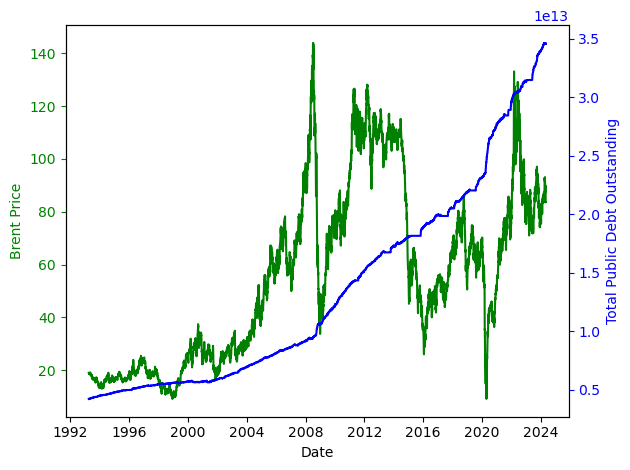

In [15]:
# строим график
price_and_debt = data[['Date', 'Brent Price', 'Total Public Debt Outstanding']]
fig, ax1 = plt.subplots()
ax1.plot(price_and_debt['Date'], price_and_debt['Brent Price'], 'g-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Brent Price', color='g')
ax1.tick_params('y', colors='g')
ax2 = ax1.twinx()
ax2.plot(price_and_debt['Date'], price_and_debt['Total Public Debt Outstanding'], 'b-')
ax2.set_ylabel('Total Public Debt Outstanding', color='b')
ax2.tick_params('y', colors='b')
fig.tight_layout()
plt.show()



       Brent Price  Debt Held by the Public  Intragovernmental Holdings  \
count  7686.000000             4.782000e+03                4.782000e+03   
mean     55.819486             1.319439e+13                5.105004e+12   
std      32.837088             6.521508e+12                1.007860e+12   
min       9.100000             3.333039e+12                1.623478e+12   
25%      24.980000             7.589717e+12                4.398676e+12   
50%      53.695000             1.274346e+13                5.010989e+12   
75%      78.247500             1.621699e+13                5.857046e+12   
max     143.950000             2.757102e+13                7.136034e+12   

       Total Public Debt Outstanding  Source Line Number  Fiscal Year  \
count                   7.686000e+03              7686.0  7686.000000   
mean                    1.351833e+13                 1.0  2008.566615   
std                     8.541417e+12                 0.0     8.961868   
min                     4.225874

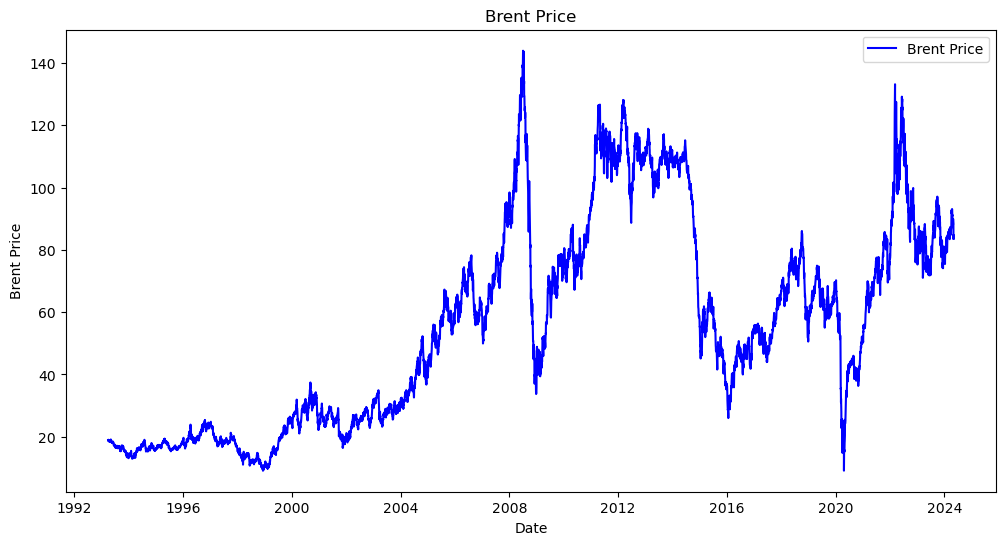

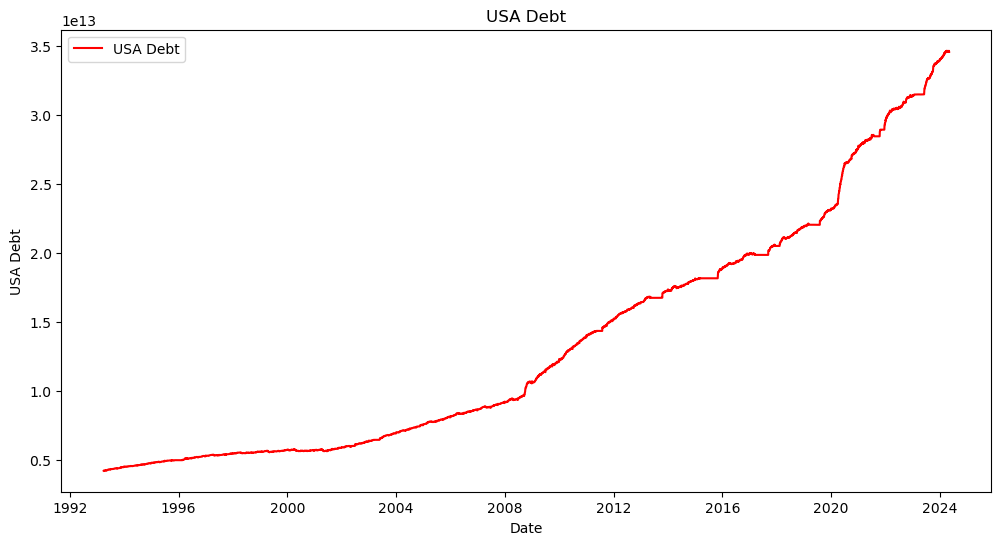

                               Brent Price  Total Public Debt Outstanding
Brent Price                       1.000000                       0.572528
Total Public Debt Outstanding     0.572528                       1.000000


In [21]:
print(data.describe())

# Построим графики цены нефти Brent и общего государственного долга США
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Brent Price'], label='Brent Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Brent Price')
plt.title('Brent Price')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Total Public Debt Outstanding'], label='USA Debt', color='red')
plt.xlabel('Date')
plt.ylabel('USA Debt')
plt.title('USA Debt')
plt.legend()
plt.show()

# Корреляционный анализ
correlation = data[['Brent Price', 'Total Public Debt Outstanding']].corr()
print(correlation)


Корреляция 0.57, влияние положительное, но не велико, поэтому госдолг сша можно далее не учитывать

# сравнение с поставками нефти и её добычей

In [22]:
# получение цен нефти марки brent
brent_price = pd.read_excel("RBRTEd.xls", sheet_name="Data 1", skiprows=2)
brent_price = brent_price.rename({"Date": "Date", "Europe Brent Spot Price FOB (Dollars per Barrel)": "Brent Price"}, axis=1)
brent_price.head()



,Date,Brent Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [51]:
all_prices_before_2000 = pd.read_excel("T73.xlsx", skiprows=2, nrows=12)
all_prices_before_2000
all_prices_after_2000 = pd.read_excel("T73.xlsx", skiprows=16, nrows=12)
all_prices_after_2000
all_prices_before_2000T = all_prices_before_2000.T
all_prices_after_2000T = all_prices_after_2000.T

all_prices_raw = all_prices_before_2000T
all_prices_raw.append(all_prices_after_2000T)

all_prices_raw

C:\Users\mrmep\AppData\Local\Temp\ipykernel_18132\308144333.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_prices_raw.append(all_prices_after_2000T)


,0,1,2,3,4,5,6,7,8,9,10,11
Monthly,ICE Brent,1st forward month,6th forward month,12th forward month,NYMEX WTI,1st forward month,6th forward month,12th forward month,DME Oman,1st forward month,6th forward month,12th forward month
1990-01-01 00:00:00,NaN,20.2134,18.6353,na,NaN,22.617,20.1453,19.2343,NaN,na,na,na
1990-02-01 00:00:00,NaN,19.696,18.5945,na,NaN,22.3118,20.8041,20.2599,NaN,na,na,na
1990-03-01 00:00:00,NaN,18.7772,18.7324,na,NaN,20.6044,20.6924,20.5476,NaN,na,na,na
1990-04-01 00:00:00,NaN,17.2713,18.0463,na,NaN,18.6209,20.118,20.0793,NaN,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-01 00:00:00,NaN,77.115,79.7659,82.3932,NaN,76.6668,79.8514,82.1,NaN,74.5805,77.7941,80.1941
2010-09-01 00:00:00,NaN,78.4173,80.58,83.0514,NaN,75.5486,80.4457,82.6452,NaN,75.7871,78.4781,80.6181
2010-10-01 00:00:00,NaN,83.5362,85.2924,87.0305,NaN,81.9748,84.8786,86.5243,NaN,80.6652,82.8219,84.7571
2010-11-01 00:00:00,NaN,86.1595,87.2573,88.4741,NaN,84.3148,86.5062,87.8038,NaN,83.7241,84.4936,85.7677


In [52]:
new_header = all_prices_raw.iloc[0]
all_prices_raw = all_prices_raw[1:]
all_prices_raw.columns = new_header

In [53]:
all_prices_raw

Monthly,ICE Brent,1st forward month,6th forward month,12th forward month,NYMEX WTI,1st forward month,6th forward month,12th forward month,DME Oman,1st forward month,6th forward month,12th forward month
1990-01-01,NaN,20.2134,18.6353,na,NaN,22.617,20.1453,19.2343,NaN,na,na,na
1990-02-01,NaN,19.696,18.5945,na,NaN,22.3118,20.8041,20.2599,NaN,na,na,na
1990-03-01,NaN,18.7772,18.7324,na,NaN,20.6044,20.6924,20.5476,NaN,na,na,na
1990-04-01,NaN,17.2713,18.0463,na,NaN,18.6209,20.118,20.0793,NaN,na,na,na
1990-05-01,NaN,17.0974,17.8727,na,NaN,18.4398,20.0386,19.9841,NaN,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-01,NaN,77.115,79.7659,82.3932,NaN,76.6668,79.8514,82.1,NaN,74.5805,77.7941,80.1941
2010-09-01,NaN,78.4173,80.58,83.0514,NaN,75.5486,80.4457,82.6452,NaN,75.7871,78.4781,80.6181
2010-10-01,NaN,83.5362,85.2924,87.0305,NaN,81.9748,84.8786,86.5243,NaN,80.6652,82.8219,84.7571
2010-11-01,NaN,86.1595,87.2573,88.4741,NaN,84.3148,86.5062,87.8038,NaN,83.7241,84.4936,85.7677


In [114]:
all_prices = all_prices_raw.copy()

all_prices.iloc[:, 0] = all_prices.iloc[:, 1] # brent
all_prices.iloc[:, 4] = all_prices.iloc[:, 5] # wti
all_prices.iloc[:, 8] = all_prices.iloc[:, 9] # dme

all_prices = all_prices[["ICE Brent", "NYMEX WTI", "DME Oman"]]
all_prices=all_prices.reset_index()
all_prices.columns.name = None
all_prices.rename(columns={'index': 'Date', "ICE Brent": "Brent", "NYMEX WTI": "WTI", "DME Oman": "DME"}, inplace=True)
all_prices['Date'] = pd.to_datetime(all_prices['Date'])
all_prices = all_prices.replace("na", np.nan)
all_prices

,Date,Brent,WTI,DME
0,1990-01-01,20.2134,22.6170,NaN
1,1990-02-01,19.6960,22.3118,NaN
2,1990-03-01,18.7772,20.6044,NaN
3,1990-04-01,17.2713,18.6209,NaN
4,1990-05-01,17.0974,18.4398,NaN
...,...,...,...,...
247,2010-08-01,77.1150,76.6668,74.5805
248,2010-09-01,78.4173,75.5486,75.7871
249,2010-10-01,83.5362,81.9748,80.6652
250,2010-11-01,86.1595,84.3148,83.7241


In [117]:
mean = all_prices[["Brent", "WTI", "DME"]].mean(skipna=True, axis=1)
all_prices["Average"] = mean
all_prices

,Date,Brent,WTI,DME,Average
0,1990-01-01,20.2134,22.6170,NaN,21.415200
1,1990-02-01,19.6960,22.3118,NaN,21.003900
2,1990-03-01,18.7772,20.6044,NaN,19.690800
3,1990-04-01,17.2713,18.6209,NaN,17.946100
4,1990-05-01,17.0974,18.4398,NaN,17.768600
...,...,...,...,...,...
247,2010-08-01,77.1150,76.6668,74.5805,76.120767
248,2010-09-01,78.4173,75.5486,75.7871,76.584333
249,2010-10-01,83.5362,81.9748,80.6652,82.058733
250,2010-11-01,86.1595,84.3148,83.7241,84.732800


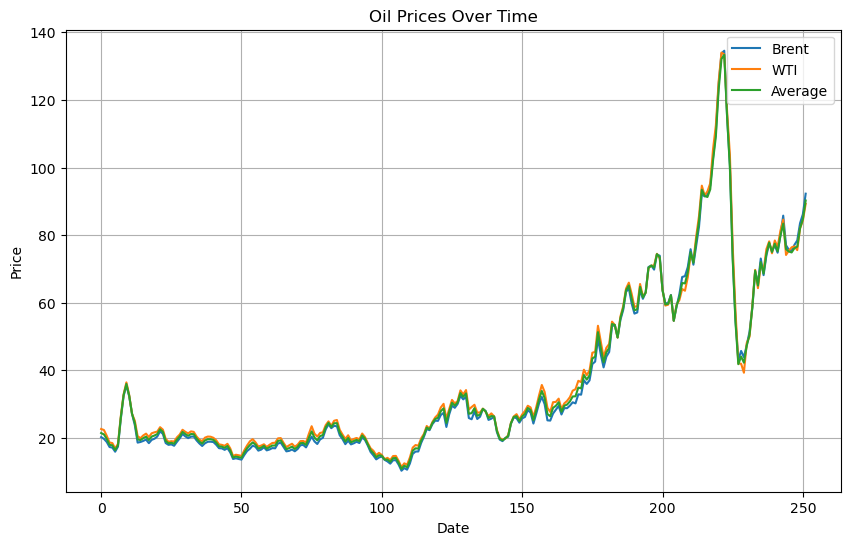

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(all_prices.index, all_prices["Brent"], label='Brent')
plt.plot(all_prices.index, all_prices["WTI"], label='WTI')
plt.plot(all_prices.index, all_prices["Average"], label='Average')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


Данные марки нефти являются эталоннымы, так что дальнейший анализ можно проводить со средним значением всех их цен